# Ejercicio 4: Modelo Probabilístico

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

## Parte 0: Carga del Corpus

In [1]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad 
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [2]:
import re

def clean_text(texto):
    texto = re.sub(r'<.*?>', '', texto)
    texto = re.sub(r'[.,()\"\'\x08]', ' ', texto)
    texto = texto.lower()
    texto = re.sub(r'[^a-z0-9\s]', ' ', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

In [3]:
df = pd.DataFrame(newsgroupsdocs, columns=['doc'])
df_clean = df['doc'].apply(clean_text)
df_clean

0        i am sure some bashers of pens fans are pretty...
1        my brother is in the market for a high perform...
2        finally you said what you dream about mediterr...
3        think it s the scsi card doing the dma transfe...
4        1 i have an old jasmine drive which i cannot u...
                               ...                        
18841    dn from nyeda cnsvax uwec edu david nye dn a n...
18842    not in isolated ground recepticles usually an ...
18843    i just installed a dx2 66 cpu in a clone mothe...
18844    wouldn t this require a hyper sphere in 3 spac...
18845    after a tip from gary crum crum fcom cc utah e...
Name: doc, Length: 18846, dtype: object

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import porter
import re

# Descargar recursos una sola vez
nltk.download('punkt')
nltk.download('stopwords')

stop = set(stopwords.words('english'))
stemmer = porter.PorterStemmer()

def preprocesar(texto):
    tokens = word_tokenize(texto)
    tokens = [t for t in tokens if t.isalpha() and t not in stop]
    tokens = [stemmer.stem(t) for t in tokens]
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus12\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus12\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import math
def get_vocabulario(docs):
    vocab = set()
    for doc in docs:
        vocab.update(doc)
    return sorted(list(vocab))

def calcular_tf(doc, vocab):
    tf = {}
    total = len(doc)
    if total == 0:
        return {term: 0 for term in vocab}
    for term in vocab:
        tf[term] = doc.count(term) / total
    return tf

def calcular_idf(corpus, vocab):
    N = len(corpus)
    idf = {}
    for term in vocab:
        df = sum(1 for doc in corpus if term in doc)
        idf[term] = math.log(N / (df if df > 0 else 1))
    return idf

def calcular_tfidf(corpus, vocab, idf):
    tfidf_docs = []
    for doc in corpus:
        tf = calcular_tf(doc, vocab)
        tfidf = {term: tf[term] * idf[term] for term in vocab}
        tfidf_docs.append(tfidf)
    return tfidf_docs

In [6]:
type(df_clean)


pandas.core.series.Series

In [7]:
df_10 = df_clean.head(1000)

In [8]:
# lista de listas
corpus_preprocesado = [preprocesar(doc) for doc in df_10]

### TF-IDF manual

In [9]:
# 1. Vocabulario
vocab = get_vocabulario(corpus_preprocesado)
# 2. IDF del corpus
idf = calcular_idf(corpus_preprocesado, vocab)
# 3. TF-IDF final
tfidf = calcular_tfidf(corpus_preprocesado, vocab, idf)

In [10]:
df_tfidf = pd.DataFrame(tfidf)
print(df_tfidf)

      aa  aaa  aaahhhh  aacvkc  aamir  aammmaaaazzzzzziinnnnggggg  aap  \
0    0.0  0.0      0.0     0.0    0.0                         0.0  0.0   
1    0.0  0.0      0.0     0.0    0.0                         0.0  0.0   
2    0.0  0.0      0.0     0.0    0.0                         0.0  0.0   
3    0.0  0.0      0.0     0.0    0.0                         0.0  0.0   
4    0.0  0.0      0.0     0.0    0.0                         0.0  0.0   
..   ...  ...      ...     ...    ...                         ...  ...   
995  0.0  0.0      0.0     0.0    0.0                         0.0  0.0   
996  0.0  0.0      0.0     0.0    0.0                         0.0  0.0   
997  0.0  0.0      0.0     0.0    0.0                         0.0  0.0   
998  0.0  0.0      0.0     0.0    0.0                         0.0  0.0   
999  0.0  0.0      0.0     0.0    0.0                         0.0  0.0   

     aardvark   ab  abandon  ...  zooid  zoom  zubkoff  zubov  zuki  zur  \
0         0.0  0.0      0.0  ...   

### TF-IDF Sklean

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
# trabaja con strings

vectorizer = TfidfVectorizer(analyzer=lambda x: x,lowercase=False)
tfidf_sklearn = vectorizer.fit_transform(corpus_preprocesado)

In [12]:
vocab = vectorizer.get_feature_names_out()
df_tfidf_sklearn = pd.DataFrame(tfidf_sklearn.toarray(), columns=vocab)
df_tfidf_sklearn

,aa,aaa,aaahhhh,aacvkc,aamir,aammmaaaazzzzzziinnnnggggg,aap,aardvark,ab,abandon,...,zooid,zoom,zubkoff,zubov,zuki,zur,zurbrin,zv,zviq,zzzzzzt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Parte 2: Ranking de documentos usando TF-IDF

### Actividad 

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

In [13]:
def procesar_query(query):
    limpio = clean_text(query)
    tokens = preprocesar(limpio)
    return " ".join(tokens)

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

def buscar_tfidf(query, top_k=5):
    query_proc = procesar_query(query)
    query_vec = vectorizer.transform([query_proc])
    # similitud de coseno entre consulta y cada documento
    sims = cosine_similarity(query_vec, df_tfidf_sklearn)[0]
    # ordenar descendentemente por similitud
    ranking = sims.argsort()[::-1][:top_k]
    return [(i, sims[i]) for i in ranking]

In [36]:
def scores_tfidf(query):
    query_proc = procesar_query(query)
    query_vec = vectorizer.transform([query_proc])
    sims = cosine_similarity(query_vec, df_tfidf_sklearn)[0]
    return sims

In [15]:
query = "vegetable"

In [16]:
procesar_query(query)

'veget'

In [17]:
buscar_tfidf(query,  top_k=5)

[(np.int64(493), np.float64(0.428766909410498)),
 (np.int64(458), np.float64(0.23668304217800426)),
 (np.int64(500), np.float64(0.23519909445816645)),
 (np.int64(543), np.float64(0.21828567518469058)),
 (np.int64(531), np.float64(0.21377750944553447))]

In [18]:
df_10[493]

'a slightly used less than two months old suprafaxmodem is for sale it comes with latest rom 1 2h communication software fax software original manuals and the original registration card here are some specs model supfaxv32bis description suprafaxmodem v 32bis type internal data speed 14 400 12 000 9600 7200 4800 2400 1200 300 bps data upto 57000bps with v 42 data compression protocols bell 103 212a ccit v 21 v 22 v 22bis v 32 v 32bis v 42 v 42bis mnp 2 5 mnp 10 fax 14 400 12 000 9600 7200 4800 2400 bps send receive fax class 1 2 commnads group iii compatible transmission v 17 v 29 v 27ter other non volatile memory autoanswer autodial tone or pulse extended at commands and result codes includes diagnostics phone jacks subscriptions to free online services 5 year warranty asking 180 neg s h if interested please e mail'

## Parte 3: Ranking con BM25

### Actividad 

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

In [33]:
def build_bm25_index(docs):
    tokenized_docs = list(docs)
    N = len(tokenized_docs)
    doc_lengths = [len(doc) for doc in tokenized_docs]
    avgdl = sum(doc_lengths) / N
    term_freqs = []
    df = {}
    for tokens in tokenized_docs:
        tf = {}
        seen = set()
        for t in tokens:
            tf[t] = tf.get(t, 0) + 1
            if t not in seen:
                df[t] = df.get(t, 0) + 1
                seen.add(t)
        term_freqs.append(tf)
    return {
        "docs": tokenized_docs,
        "tf": term_freqs,
        "df": df,
        "N": N,
        "avgdl": avgdl,
        "doc_lengths": doc_lengths
    }

def bm25_score(query_tokens, index, k1=1.5, b=0.75):
    scores = []
    for i in range(index["N"]):
        score = 0.0
        doc_len = index["doc_lengths"][i]
        tf_doc = index["tf"][i]
        for term in query_tokens:
            if term not in index["df"]:
                continue
            df = index["df"][term]
            idf = math.log((index["N"] - df + 0.5) / (df + 0.5))
            f = tf_doc.get(term, 0)
            denom = f + k1 * (1 - b + b * (doc_len / index["avgdl"]))
            score += idf * ((f * (k1 + 1)) / denom)
        scores.append(score)
    return scores


def buscar_bm25(query, index, top_k=5):
    query_tokens = procesar_query(query)
    scores = bm25_score(query_tokens, index)
    ranking = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)
    ranking = ranking[:top_k]
    return [(i, scores[i]) for i in ranking]


In [35]:
index_bm25 = build_bm25_index(corpus_preprocesado)
resultados = buscar_bm25("vegetable", index_bm25, top_k=5)
resultados

[(493, 13.615112136495174),
 (531, 12.94927370481955),
 (500, 12.327017911644704),
 (81, 11.744554171331695),
 (599, 11.019833695943975)]

## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad 

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

In [78]:
import numpy as np
import matplotlib.pyplot as plt

def comparar_tfidf_bm25(query):
    # Scores completos
    tfidf_scores = np.array(scores_tfidf(query), dtype=float)
    bm25_scores = np.array(bm25_score(procesar_query(query), index_bm25), dtype=float)

    # Normalización al rango 0-1
    tfidf_norm = tfidf_scores / tfidf_scores.max() if tfidf_scores.max() != 0 else tfidf_scores
    bm25_norm = bm25_scores / bm25_scores.max() if bm25_scores.max() != 0 else bm25_scores

    num_docs = len(tfidf_scores)
    x = np.arange(num_docs)

    bar_width = 8

    plt.figure(figsize=(16, 7))

    plt.bar(x - bar_width/2, tfidf_norm, width=bar_width, label="TF-IDF (normalizado)")

    # Barra 2: Mover a la derecha
    plt.bar(x + bar_width/2, bm25_norm, width=bar_width, label="BM25 (normalizado)")

    plt.xlabel("ID de documento")
    plt.ylabel("Score normalizado (0 a 1)")
    plt.title("Comparación visual: TF-IDF vs BM25 (normalizados)")
    plt.legend()
    plt.tight_layout()
    plt.show()


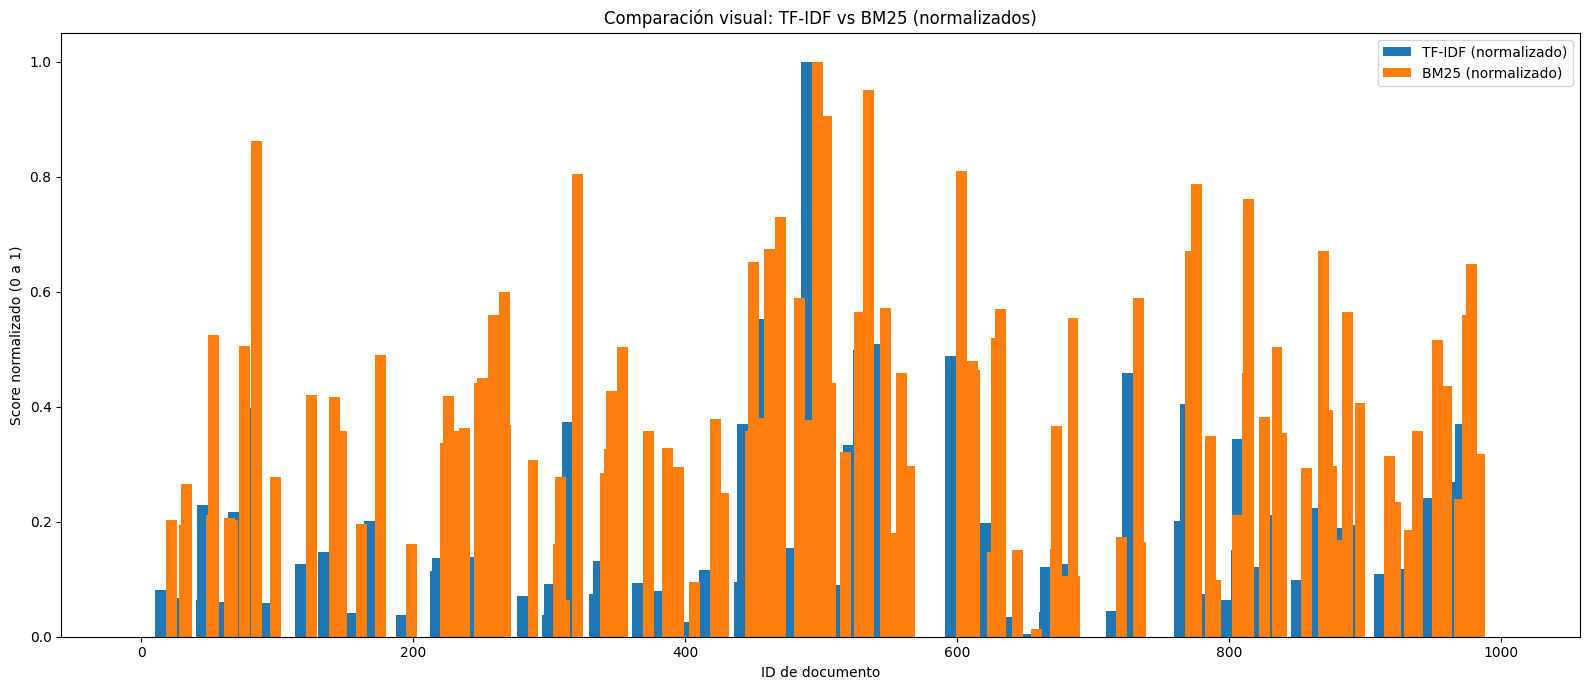

In [79]:
comparar_tfidf_bm25("Vegetable")

## Parte 5: Evaluación con consulta relevante

### Actividad 

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

In [91]:
query = "Vegetable"
relevantes = {493, 531, 500}

In [92]:
def precision_at_k(rank, relevantes, k=3):
    top_k = rank[:k]
    relevantes_en_topk = sum(1 for doc, score in top_k if doc in relevantes)
    return relevantes_en_topk / k
def average_precision(rank, relevantes):
    hits = 0
    precisiones = []
    for i, (doc, score) in enumerate(rank, start=1):
        if doc in relevantes:
            hits += 1
            precisiones.append(hits / i)
    return sum(precisiones) / len(relevantes) if relevantes else 0

In [93]:
def evaluar_modelos(query, relevantes):
    # obtener rankings
    tfidf_rank = buscar_tfidf(query, top_k=10)
    bm25_rank  = buscar_bm25(query, index_bm25, top_k=5)

    # Precision@3
    p3_tfidf = precision_at_k(tfidf_rank, relevantes, k=3)
    p3_bm25  = precision_at_k(bm25_rank,  relevantes, k=3)

    # MAP
    map_tfidf = average_precision(tfidf_rank, relevantes)
    map_bm25  = average_precision(bm25_rank,  relevantes)

    print("=== Evaluación ===")
    print(f"Precision@3 TF-IDF: {p3_tfidf:.4f}")
    print(f"Precision@3 BM25 : {p3_bm25:.4f}")
    print()
    print(f"MAP TF-IDF: {map_tfidf:.4f}")
    print(f"MAP BM25 : {map_bm25:.4f}")

    return {
        "p3_tfidf": p3_tfidf,
        "p3_bm25": p3_bm25,
        "map_tfidf": map_tfidf,
        "map_bm25": map_bm25
    }


In [94]:
evaluar_modelos("Vegetable", relevantes)


=== Evaluación ===
Precision@3 TF-IDF: 0.6667
Precision@3 BM25 : 1.0000

MAP TF-IDF: 0.7556
MAP BM25 : 1.0000


{'p3_tfidf': 0.6666666666666666,
 'p3_bm25': 1.0,
 'map_tfidf': 0.7555555555555555,
 'map_bm25': 1.0}